In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/heart.csv")
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

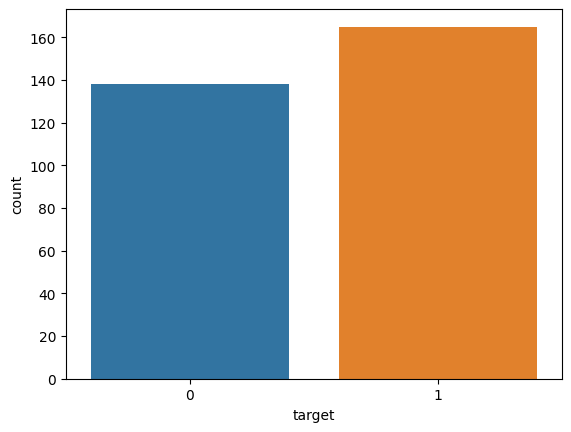

In [ ]:
sns.countplot(x=df["target"])

In [ ]:
X = df.drop(columns='target',axis=1)
y = df['target']


> Spliting Training and Testing Data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state=4)

Training the model with multiple algorithms


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Ridge Classifier', RidgeClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('K-Neighbors Classifier', KNeighborsClassifier(n_neighbors=5)))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Naives Bayes Classifier', GaussianNB()))


In [ ]:
def model_select(model):
    model.fit(X_train,y_train)
    y_pred =model.predict(X_test)
    return metrics.accuracy_score(y_test,y_pred)*100

In [ ]:
for name,model in models:
    print(f"{name} : {model_select(model)}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression : 88.52459016393442
Ridge Classifier : 86.88524590163934
Decision Tree Classifier : 83.60655737704919
K-Neighbors Classifier : 63.934426229508205
Random Forest Classifier : 85.24590163934425
Naives Bayes Classifier : 86.88524590163934


Saving the model as pickle file

In [ ]:
import pickle
file ='model.pkl'
pickle.dump(model,open(file,'wb'))

In [ ]:
!pip install streamlit


In [ ]:
%%writefile Health_app.py
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Load the heart disease model
with open('model.pkl', 'rb') as pkl:
    heart_classifier = pickle.load(pkl)


# Function to predict heart disease
def predict_heart_disease():
    st.sidebar.title("Heart Disease Prediction")

    style = """<div style='background-color: #A74F3C; padding:10px'>
                <h1 style ='color:white'><Center>Heart Disease Prediction</h1>
                </div> """
    st.markdown(style, unsafe_allow_html=True)

    left, right = st.columns((2,2))
    Age = left.number_input('Enter Age in numbers ', step = 1, value=0)
    Sex = right.selectbox('Choose Gender [0-male, 1-female]', (0,1))
    Chest_Pain = left.selectbox('Choose Number of times chest pain occurs', (0,1,2,3))
    Resting_Blood_Pressure = right.number_input('Enter Resting Blood Pressure', step = 1, value=0)
    Cholestoral = left.number_input('Enter Cholestoral value', step = 1, value=0)
    Fasting_blood_sugar = right.selectbox('Select Fasting blood sugar', (0,1))
    Resting_electrocardiographic = left.selectbox('Select Resting electrocardiographic',  (0,1,2))
    Max_heart_rate = right.number_input('Enter Maximum Heart rate as whole numbers', step = 1, value=0)
    Exercise = left.selectbox('Choose whether you Exercise or not',(0,1))
    Old_peak = right.number_input('Enter Old peak as decimal numbers', step = 1, value=0)
    Slope = left.selectbox('Choose the Slope' , (0,1,2))
    No_vessels = right.selectbox('Select the no of vessels', (0,1,2,3,4))
    Thal = left.selectbox('Select Thal',(0,1,2,3))
    predict_button = st.button('Do I have Heart Disease ?')

    # When predict button is clicked
    if predict_button:
        res = heart_classifier.predict([[Age,Sex,Chest_Pain,Resting_Blood_Pressure,Cholestoral,Fasting_blood_sugar,Resting_electrocardiographic,Max_heart_rate,Exercise,Old_peak,Slope,No_vessels,Thal, ]])
        if res[0] == 0:
            st.success("No, You do not have Heart Disease")
        else:
            st.success("Yes, You have Heart Disease")

# Function to predict diabetes
df1=pd.read_csv("/content/diabetes.csv")
def predict_diabetes(data):
    st.sidebar.title("Diabetes Prediction")

    pregnancies = st.sidebar.slider("Number of Pregnancies", 0, 17, 3)
    glucose = st.sidebar.slider("Glucose Level", 0, 200, 120)
    blood_pressure = st.sidebar.slider("Blood Pressure", 0, 122, 70)
    skin_thickness = st.sidebar.slider("Skin Thickness", 0, 99, 20)
    insulin = st.sidebar.slider("Insulin Level", 0, 846, 79)
    bmi = st.sidebar.slider("BMI", 0.0, 67.1, 32.0)
    dpf = st.sidebar.slider("Diabetes Pedigree Function", 0.0, 2.42, 0.3725)
    age = st.sidebar.slider("Age", 21, 81, 29)

    input_data = pd.DataFrame({
        "Pregnancies": [pregnancies],
        "Glucose": [glucose],
        "BloodPressure": [blood_pressure],
        "SkinThickness": [skin_thickness],
        "Insulin": [insulin],
        "BMI": [bmi],
        "DiabetesPedigreeFunction": [dpf],
        "Age": [age]
    })

    X = data.drop("Outcome", axis=1)
    y = data["Outcome"]

    # Train a random forest classifier
    clf = RandomForestClassifier()
    clf.fit(X, y)

    # Make predictions
    prediction = clf.predict(input_data)

    # Display prediction
    st.title("Diabetes Prediction")
    if prediction[0] == 0:
        st.write("No diabetes detected.")
    else:
        st.write("Diabetes detected.")

    if st.checkbox("Show Model Evaluation"):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        st.write(f"Accuracy: {accuracy:.2f}")
        st.write("Classification Report:")
        st.write(report)

# Streamlit homepage
def main():
    st.set_page_config(
        page_title="Health Prediction App",
        page_icon="💊",
        layout="wide"
    )

    st.title("Health Prediction App")

    # Create a sidebar selection box for choosing the prediction model
    model_choice = st.sidebar.selectbox("Choose a Model", ("Home", "Heart Disease", "Diabetes"))

    if model_choice == "Home":
        st.markdown("Welcome to the Health Prediction App! Please select a prediction model from the sidebar.")
    elif model_choice == "Heart Disease":
        predict_heart_disease()
    elif model_choice == "Diabetes":
        # Load the diabetes data

        predict_diabetes(df1)
if __name__ == '__main__':
    main()


Overwriting Health_app.py


In [ ]:
! pip install streamlit -q

In [ ]:
! streamlit run Health_app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.245.206:8501

npx: installed 22 in 2.594s
your url is: https://sharp-cougars-bake.loca.lt
  Stopping...
^C


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.245.245.206
